In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

**1. Write a Matlab function file for $f(θ)$. The parameters $L_1, L_2, L_3, γ, x_1, x_2, y_2$ are fixed constants, and the strut lengths $p_1, p_2, p_3$ will be known for a given pose. To test your code, set the parameters $L_1 = 2, L_2 = L_3 = √2, γ = π/2, p_1 = p_2 = p_3 = √5$ from Figure 1.15. Then, substituting $θ = -π/4$ or $θ = π/4$, corresponding to Figures 1.15(a, b), respectively, should make  $f(θ) = 0$.**

In [2]:
def f(theta):
    A2 = L3 * math.cos(theta) - x1
    A3 = L2 * (math.cos(theta)*math.cos(gamma) - math.sin(theta)*math.sin(gamma)) - x2
    B2 = L3 * math.sin(theta)
    B3 = L2 * (math.cos(theta)*math.sin(gamma) + math.sin(theta)*math.cos(gamma)) - y2

    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)

    out = N1**2 + N2**2 - p1**2 * D**2

    return out

L1, L2, L3 = 2, math.sqrt(2), math.sqrt(2)
p1, p2, p3 = math.sqrt(5), math.sqrt(5), math.sqrt(5)
x1, x2, y2 = 4, 0, 4
gamma = math.pi/2

**2. Plot $f(θ)$ on $[-π, π]$. As a check of your work, there should be roots at $±π/4$.**

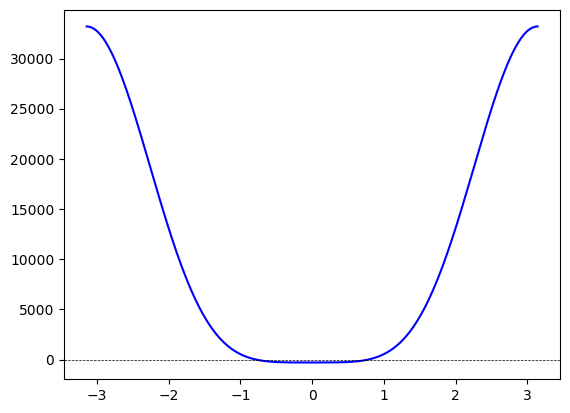

In [3]:
X = np.linspace(-math.pi, math.pi, 500)
Y = [f(x) for x in X]
plt.plot(X, Y, 'b-')
plt.axhline(0, color='black', lw = 0.5, ls='--')

**3. Reproduce Figure 1.15. In addition, draw the struts.**

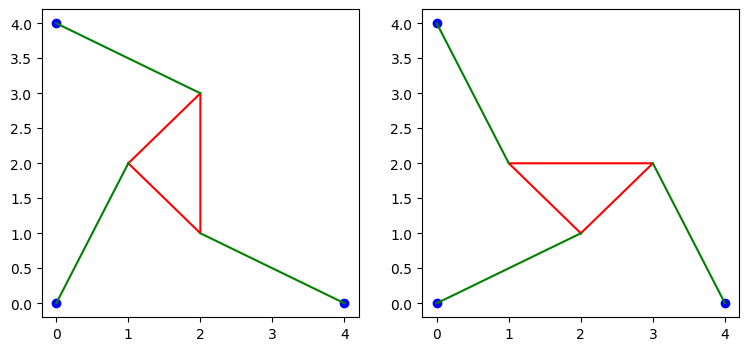

In [4]:
def spPlot(ax, u, v, p):
    ax.plot([u[0], u[1], u[2], u[0]],[v[0], v[1], v[2], v[0]], 'r')
    ax.plot([0, x1, x2],[0, 0, y2], 'bo')
    ax.plot(p[0][0], p[0][1], 'g')
    ax.plot(p[1][0], p[1][1], 'g')
    ax.plot(p[2][0], p[2][1], 'g')
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

u = [1, 2, 2]
v = [2, 1, 3]
p = [[[0, 1], [0, 2]], [[2, 4], [1, 0]], [[0, 2], [4, 3]]]
spPlot(ax1,u,v,p)

u = [2, 3, 1]
v = [1, 2, 2]
p = [[[0, 2], [0, 1]], [[3, 4], [2, 0]], [[0, 1], [4, 2]]]
spPlot(ax2,u,v,p)

**4. Solve the forward kinematics problem specified by $x_1=5, (x_2, y_2)=(0,6), L_1=L_3=3, L_2=3√2, γ=π/4, p_1=p_2=5, p_3=3$. Begin by plotting $f(θ)$. Use an equation solver to find all four poses, and plot them. Verify that $p_1, p_2,$ and $p_3$ are the lengths of the struts in your plot.**

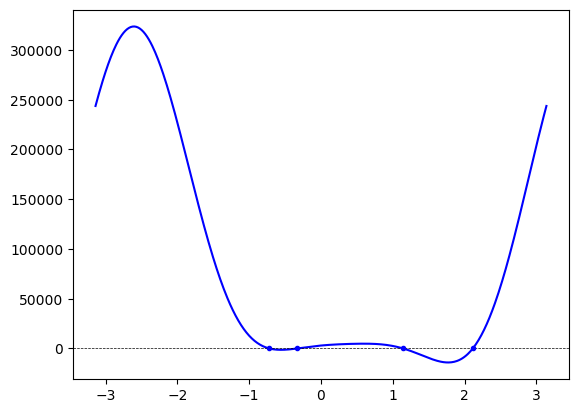

In [5]:
L1, L2, L3 = 3, 3*math.sqrt(2), 3
p1, p2, p3 = 5, 5, 3
x1, x2, y2 = 5, 0, 6
gamma = math.pi/4

X = np.linspace(-math.pi, math.pi, 500)
Y = [f(x) for x in X]
plt.plot(X, Y, 'b-')
plt.axhline(0, color='black', lw = 0.5, ls='--')

vf = np.vectorize(f)
roots = scipy.optimize.fsolve(vf, [-1, 0, 1, 2])
for root in roots:
    plt.plot(root, 0, 'b.')

Plot 1
   p1:5.00000,  p2:5.00000,  p3:3.00000
Plot 2
   p1:5.00000,  p2:5.00000,  p3:3.00000
Plot 3
   p1:5.00000,  p2:5.00000,  p3:3.00000
Plot 4
   p1:5.00000,  p2:5.00000,  p3:3.00000


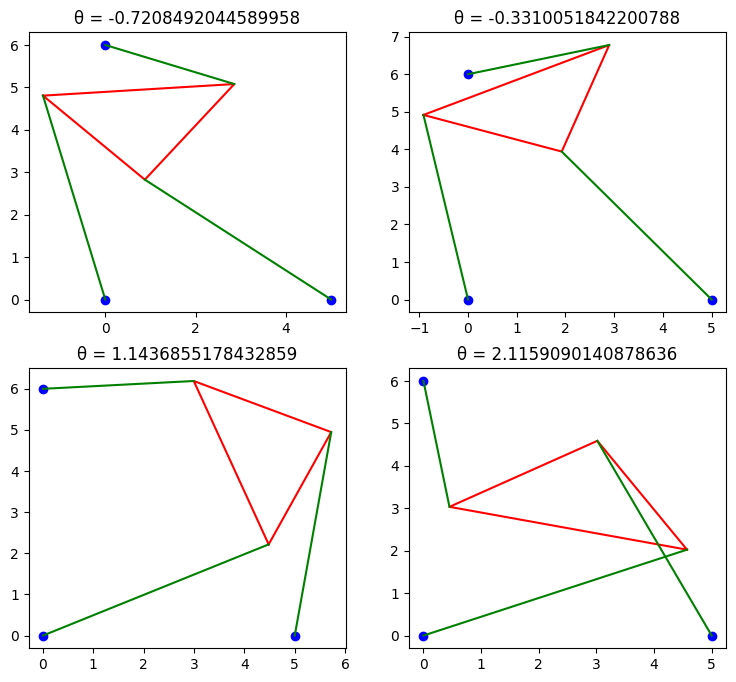

In [6]:
def platformPoints(theta):
    A2 = L3 * math.cos(theta) - x1
    A3 = L2 * (math.cos(theta)*math.cos(gamma) - math.sin(theta)*math.sin(gamma)) - x2
    B2 = L3 * math.sin(theta)
    B3 = L2 * (math.cos(theta)*math.sin(gamma) + math.sin(theta)*math.cos(gamma)) - y2
    
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)
    
    x = N1 / D
    y = N2 / D
    u = [x,(x + L2*math.cos(theta + gamma)),(x + L3*math.cos(theta))]
    v = [y,(y + L2*math.sin(theta + gamma)),(y + L3*math.sin(theta))]
    p = [[[0,x],[0,y]], [[x1,u[2]],[0,v[2]]],[[x2,u[1]],[y2,v[1]]]]
    
    return u, v, p

fig, axs = plt.subplots(2, 2, figsize=(9, 8))

for i in range(2):
    for j in range(2):
        u, v, p = platformPoints(roots[(i*2)+j])
        axs[i, j].set_title(f'θ = {roots[(i*2)+j]}')
        spPlot(axs[i][j],u,v,p)
        print(f'Plot {i*2+j+1}')
        print(f'   p1:{math.dist([p[0][0][0],p[0][1][0]], [p[0][0][1], p[0][1][1]]):.5f},',
            f' p2:{math.dist([p[1][0][0],p[1][1][0]], [p[1][0][1], p[1][1][1]]):.5f},',
            f' p3:{math.dist([p[2][0][0],p[2][1][0]], [p[2][0][1], p[2][1][1]]):.5f}')




**5. Change strut length to $p2 = 7$ and re-solve the problem. For these parameters, there are six poses.**

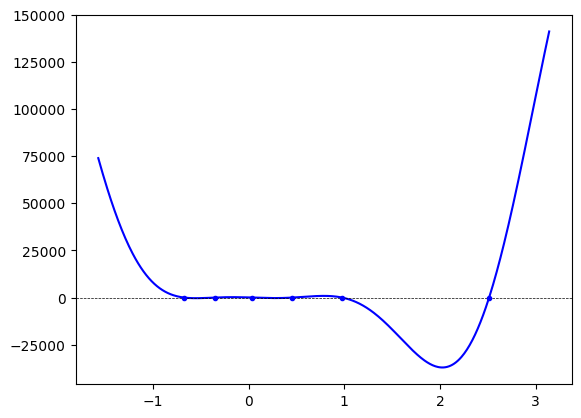

In [7]:
p2 = 7

X = np.linspace(-math.pi/2, math.pi, 500)
Y = [f(x) for x in X]
plt.plot(X, Y, 'b-')
plt.axhline(0, color='black', lw = 0.5, ls='--')

vf = np.vectorize(f)
roots = scipy.optimize.fsolve(vf, [-0.7, -0.3, 0, 0.5, 1, 2.5])
for root in roots:
    plt.plot(root, 0, 'b.')

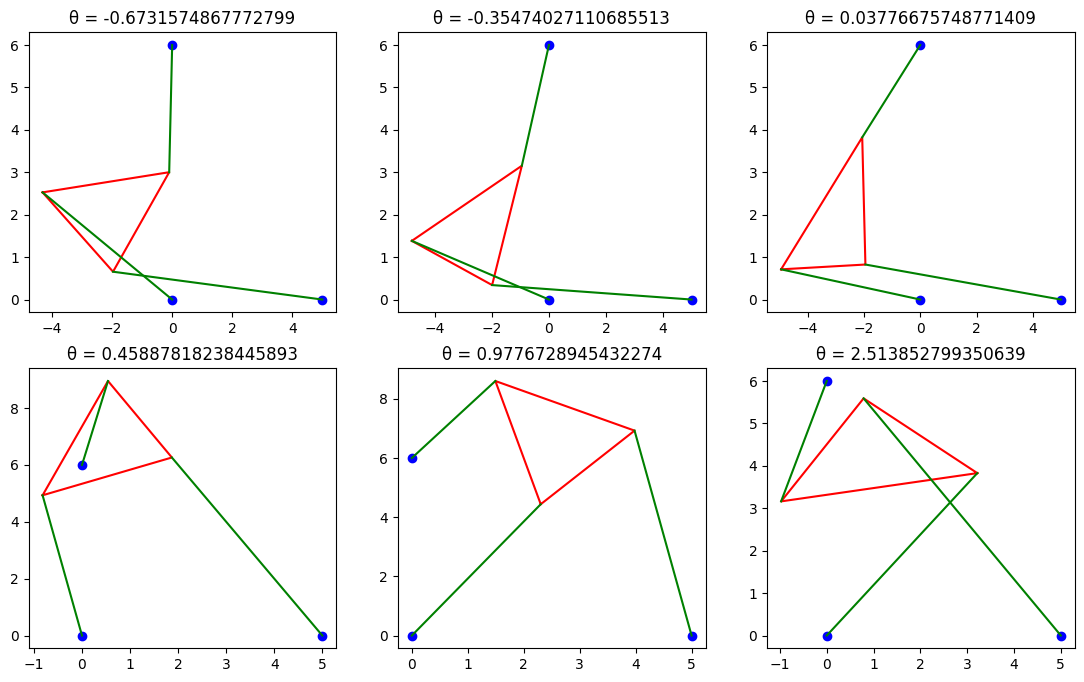

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(13.5, 8))

for i in range(2):
    for j in range(3):
        u, v, p = platformPoints(roots[(i*3)+j])
        axs[i, j].set_title(f'θ = {roots[(i*3)+j]}')
        spPlot(axs[i][j],u,v,p)

**6. Find a strut length $p$2, with the rest of the parameters as in Step 4, for which there are only two poses.**

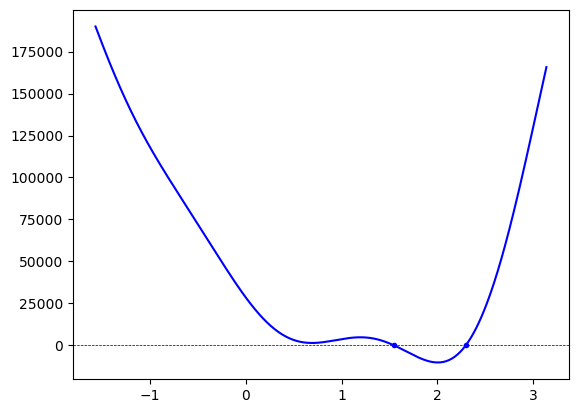

In [9]:
p2 = 9

X = np.linspace(-math.pi/2, math.pi, 500)
Y = [f(x) for x in X]
plt.plot(X, Y, 'b-')
plt.axhline(0, color='black', lw = 0.5, ls='--')

vf = np.vectorize(f)
roots = scipy.optimize.fsolve(vf, [1.6, 2.2])
for root in roots:
    plt.plot(root, 0, 'b.')

**7. Calculate the intervals in $p2$, with the rest of the parameters as in Step 4, for which there are 0,2,4, and 6 poses, respectively.**

In [ ]:
def step7(p2_res, theta_res):
    prev_out = f(-math.pi)
    prev_poseCount = 0
    poseCount = 0
    prev_p2 = 0
    
    for i in range(p2_res):
        global p2
        p2 = 10 * i / p2_res
        for j in range(theta_res):
            out = f(((2 * math.pi) * j / theta_res) - math.pi)
            if (prev_out * out) < 0:
                poseCount = poseCount + 1
            prev_out = out
        if poseCount != prev_poseCount:
            print(f'{prev_poseCount} poses: ({prev_p2}, {p2})')
            prev_p2 = p2
        prev_poseCount = poseCount
        poseCount = 0
    
    print(f'{prev_poseCount} poses: ({prev_p2}, {p2})')

step7(10000, 360)